# F20DL Lab 9

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import math

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Ignore convergence warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action="ignore", category=ConvergenceWarning)

In [2]:
# Load the dataset into numpy arrays
images = np.load("./datasets/smiley_X.npy")
labels = np.load("./datasets/smiley_Y.npy")

In [3]:
# Flatten image data and convert values to int
X = np.asarray([x.flatten() for x in images]).astype(int)
y = labels.astype(int)

In [4]:
# data is an array of all images. Images are represented as a flattened row of pixel values.
# To get pixel (r, c) of image i, use data[i-1][9*(r-1) + (c-1)] 
# Or use images[i][r-1][c-1][0]

# data[0] returns a row of pixel values representing the 1st image.
# data[0][24] and images[0][2][6][0] return the value of the pixel in the 3rd row and 7th column of the 1st image 
# (r=3, c=7).
# target[0] returns the label for the 1st image.

In [5]:
# Shows smiley as an image. 'smiley' should be an element in 'images'
def show_smiley(smiley):
    plt.figure(figsize=(2,2))
    plt.imshow(smiley, cmap="Greys")

## SGD Classifier

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0) # 10% training, 90% testing

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error

clf_SGD = SGDClassifier(random_state=0)
clf_SGD.fit(X_train, y_train)

# Get error on training set
y_pred = clf_SGD.predict(X_train)
train_error = mean_squared_error(y_train, y_pred)
print("MSE on training set: {0}".format(train_error))

MSE on training set: 0.0


In [8]:
# Get error on testing set
y_pred = clf_SGD.predict(X_test)
test_error = mean_squared_error(y_test, y_pred)
print("MSE on testing set: {0}".format(test_error))

MSE on testing set: 0.2076923076923077


## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
# Create Logistic Regression
model = LogisticRegression(solver='liblinear', random_state=0)

# Train Logistic Regression Model
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_train)

In [10]:
# Get error on training set
train_error = mean_squared_error(y_train, y_pred)
print("MSE on training set: {0}".format(train_error))

MSE on training set: 0.0


## Experiments with Hyperparameters

### No. of Iterations

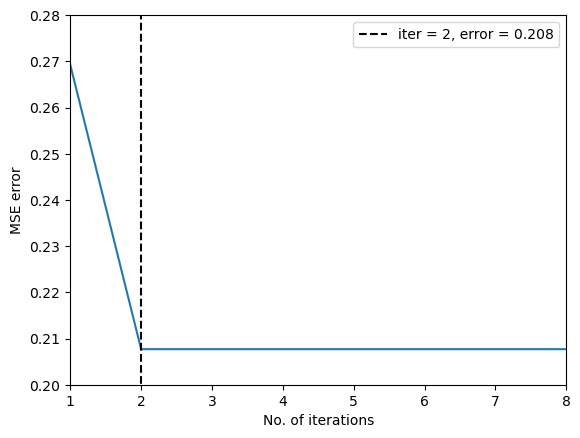

In [11]:
iterations = list(range(1, 9))
errors = []

for iter in iterations:
    clf = SGDClassifier(max_iter=iter, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)

lowest_error = round(errors[1], 3)
plt.plot(iterations, errors)
plt.axis([1, 8, 0.2, 0.28])
plt.plot([2, 2], [0, 1], "k--", label=f"iter = 2, error = {lowest_error}")
plt.xlabel("No. of iterations")
plt.ylabel("MSE error")
plt.legend()
plt.show()

### Learning Rate

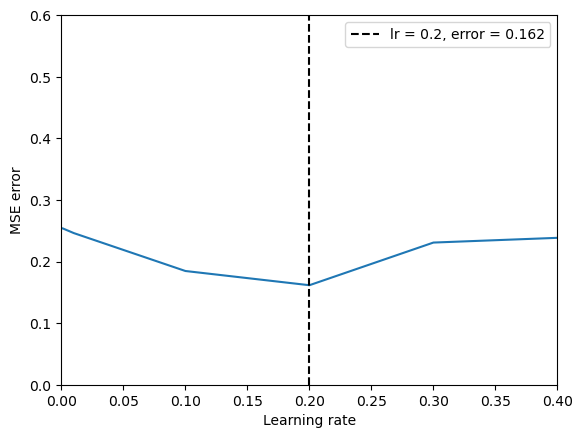

In [12]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4]
errors = []

for lr in learning_rate:
    clf = SGDClassifier(eta0=lr, learning_rate="constant", max_iter=10, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)

lowest_error = round(errors[4], 3)
plt.plot(learning_rate, errors)
plt.axis([0, 0.4, 0, 0.6])
plt.plot([0.2, 0.2], [0, 1], "k--", label=f"lr = 0.2, error = {lowest_error}")
plt.xlabel("Learning rate")
plt.ylabel("MSE error")
plt.legend()
plt.show()

### Batch Size

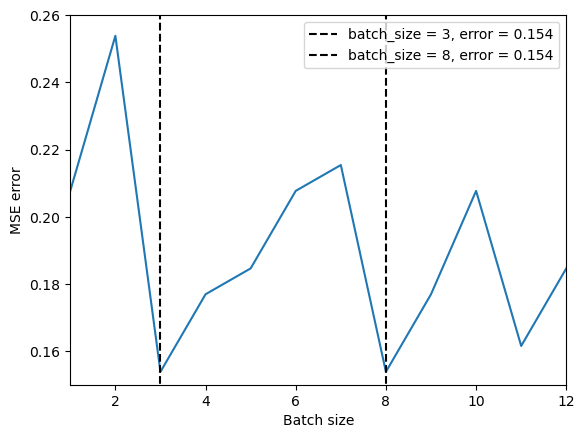

In [15]:
batch_sizes = list(range(1, 13))
errors = []

for batch_size in batch_sizes:
    # Prepare batches
    batch_count = math.ceil(X_train.shape[0] / batch_size)
    x_batches = []
    y_batches = []
    for i in range(batch_count):
        start_index = batch_size * i
        end_index = start_index + batch_size
        
        # If batch size > no. of remaining samples, set end index to last sample
        if end_index > X_train.shape[0]: 
            end_index = -1
        
        x_batches.append(X_train[start_index : end_index])
        y_batches.append(y_train[start_index : end_index])
    

    # Training
    clf = SGDClassifier(eta0=0.2, learning_rate="constant", random_state=0)
    for iter in range(10):
        for batch_no in range(batch_count):
            clf.partial_fit(x_batches[batch_no], y_batches[batch_no], classes=[0, 1])
        
    # Prediction
    y_pred = clf.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)

lowest_error1 = round(errors[2], 3)
lowest_error2 = round(errors[7], 3)
plt.plot(batch_sizes, errors)
plt.axis([1, 12, 0.15, 0.26])
plt.plot([3, 3], [0, 1], "k--", label=f"batch_size = 3, error = {lowest_error1}")
plt.plot([8, 8], [0, 1], "k--", label=f"batch_size = 8, error = {lowest_error2}")
plt.xlabel("Batch size")
plt.ylabel("MSE error")
plt.legend()
plt.show()